# SalaryData_Train 

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [10]:
# Import datasets
data=pd.read_csv('SalaryData_Train.csv')

In [11]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [53]:
# Import Labelencoder 
from sklearn.preprocessing import LabelEncoder

In [54]:
Lab_enc=LabelEncoder()

In [14]:
# Convert the data into numeric
data['workclass']=Lab_enc.fit_transform(data['workclass'])
data['education']=Lab_enc.fit_transform(data['education'])
data['maritalstatus']=Lab_enc.fit_transform(data['maritalstatus'])
data['occupation']=Lab_enc.fit_transform(data['occupation'])
data['relationship']=Lab_enc.fit_transform(data['relationship'])
data['race']=Lab_enc.fit_transform(data['race'])
data['sex']=Lab_enc.fit_transform(data['sex'])
data['native']=Lab_enc.fit_transform(data['native'])

In [15]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


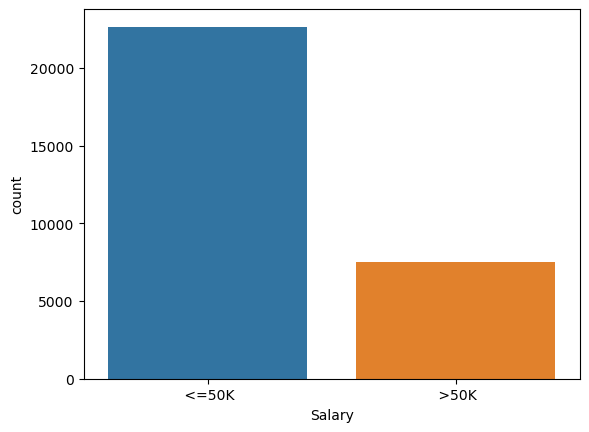

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [17]:
# Visualization
sns.countplot(x='Salary',data=data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
data['Salary'].value_counts()

<Axes: xlabel='education'>

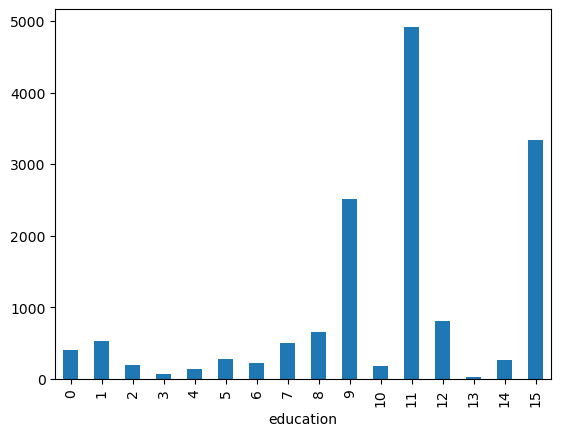

In [25]:
pd.crosstab(data['Salary'],data['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

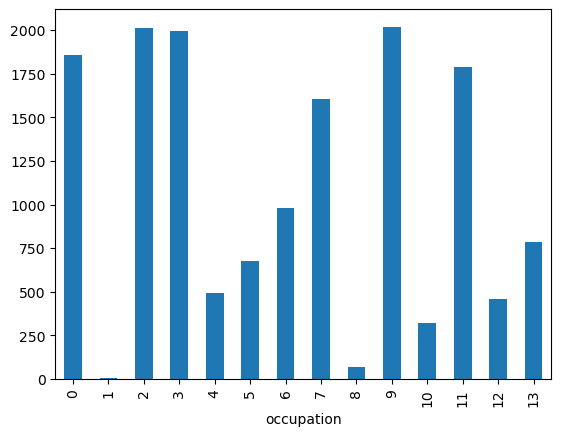

In [26]:
pd.crosstab(data['Salary'],data['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

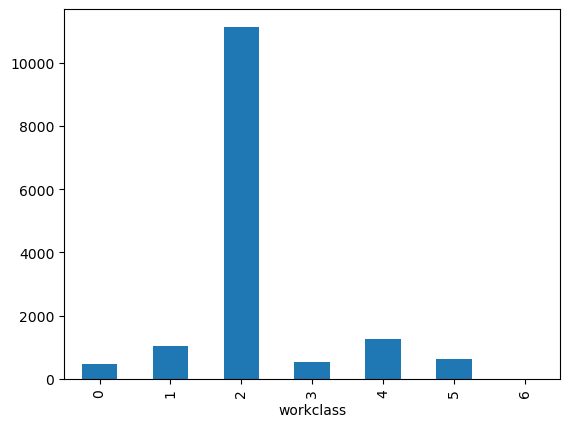

In [27]:
pd.crosstab(data['Salary'],data['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

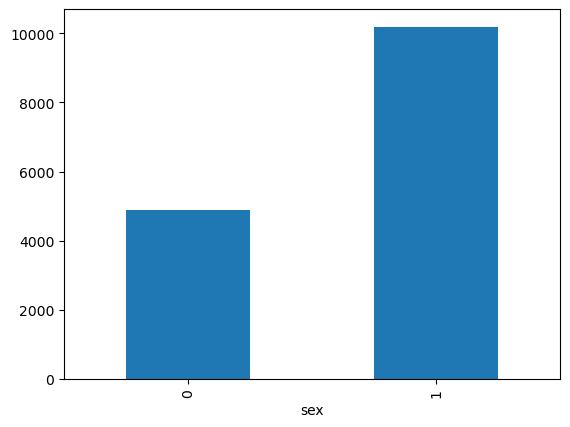

In [28]:
pd.crosstab(data['Salary'],data['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

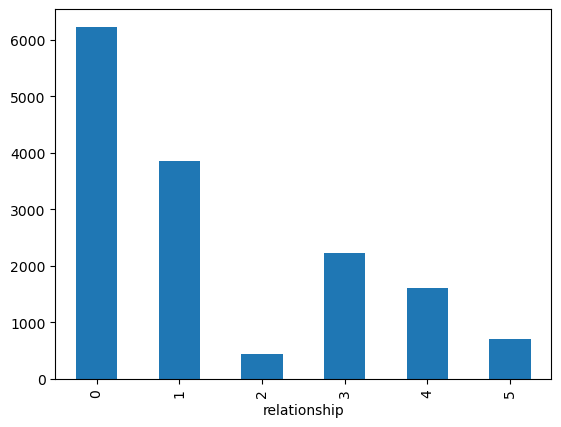

In [29]:
pd.crosstab(data['Salary'],data['relationship']).mean().plot(kind='bar')

In [30]:
target=data['Salary']

In [31]:
features=data.drop('Salary',axis=1)

In [32]:
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [33]:
features

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [34]:
# split the data
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=10)

In [36]:
# import gaussianNB
from sklearn.naive_bayes import GaussianNB

In [37]:
gaus=GaussianNB()

In [38]:
gaus.fit(x_train,y_train)

GaussianNB()

In [39]:
y_pred=gaus.predict(x_test)

In [40]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [41]:
accuracy_score(y_test,y_pred)

0.7999778981102884

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      6806
        >50K       0.69      0.35      0.46      2243

    accuracy                           0.80      9049
   macro avg       0.75      0.65      0.67      9049
weighted avg       0.78      0.80      0.77      9049



In [43]:
conf=confusion_matrix(y_test,y_pred)

In [44]:
conf

array([[6461,  345],
       [1465,  778]], dtype=int64)

<Axes: >

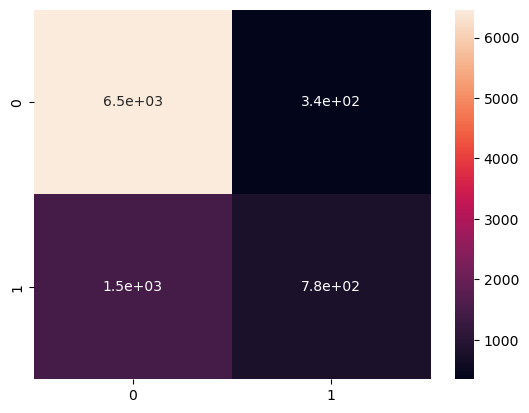

In [45]:
sns.heatmap(conf,annot=True)

# SalaryData_test 

In [46]:
# Import dataset
data1=pd.read_csv('SalaryData_Test.csv')

In [47]:
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [48]:
# import labelencoding to convert the data into numeric
from sklearn.preprocessing import LabelEncoder

In [49]:
Lab_enc=LabelEncoder()

In [50]:
data1['workclass']=Lab_enc.fit_transform(data1['workclass'])
data1['education']=Lab_enc.fit_transform(data1['education'])
data1['maritalstatus']=Lab_enc.fit_transform(data1['maritalstatus'])
data1['occupation']=Lab_enc.fit_transform(data1['occupation'])
data1['relationship']=Lab_enc.fit_transform(data1['relationship'])
data1['race']=Lab_enc.fit_transform(data1['race'])
data1['sex']=Lab_enc.fit_transform(data1['sex'])
data1['native']=Lab_enc.fit_transform(data1['native'])

In [51]:
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


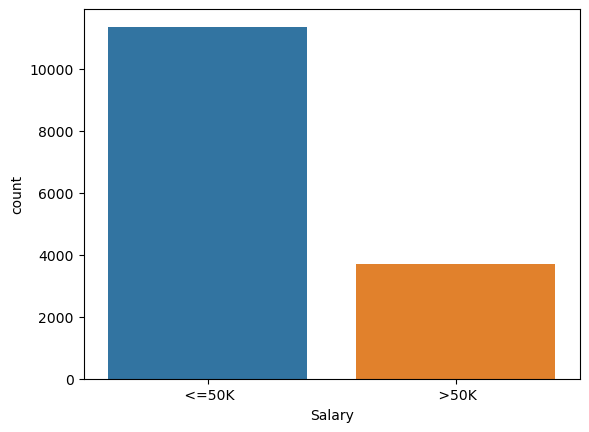

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [52]:
# Visualization
sns.countplot(x='Salary',data=data1)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
data1['Salary'].value_counts()

In [131]:
target1=data1['Salary']

In [132]:
features1=data1.drop('Salary',axis=1)

In [133]:
# Split the data
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,train_size=0.7,random_state=10)

In [135]:
# Import model
from sklearn.naive_bayes import GaussianNB

In [136]:
gaus=GaussianNB()

In [137]:
gaus.fit(x_train,y_train)

GaussianNB()

In [138]:
y_pred=gaus.predict(x_test)

In [139]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [140]:
accuracy_score(y_test,y_pred)

0.7983621071270474

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      3403
        >50K       0.69      0.33      0.45      1115

    accuracy                           0.80      4518
   macro avg       0.75      0.64      0.66      4518
weighted avg       0.78      0.80      0.77      4518



In [142]:
conf=confusion_matrix(y_test,y_pred)

In [143]:
conf

array([[3234,  169],
       [ 742,  373]], dtype=int64)

<Axes: >

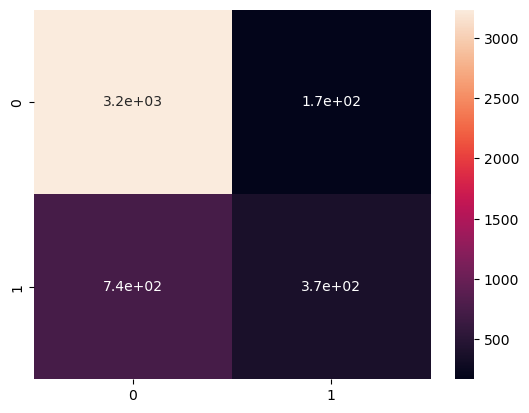

In [144]:
sns.heatmap(conf,annot=True)